## Imports

In [1]:
import os

%matplotlib inline
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>


1. - Feature such as "id" and "sex" and possibly "marriage" seem to be not as relevant in predicting whether of not a person will fail to pay their bills
   - A lot of the same features separated into different columns based on date, maybe consider combining them into one feature
   - 30,000 examples is a good size

In [2]:
credit_df = pd.read_csv("data/UCI_Credit_Card.csv")

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>


In [3]:
train_df, test_df = train_test_split(credit_df, test_size=0.3, random_state=76)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>


In [4]:
# to see general information on the dataset, such as the scale.
train_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,15011.587619,167563.508571,1.604381,1.843905,1.554667,35.412952,-0.012190,-0.132714,-0.168333,-0.223143,...,43039.813952,40121.889810,38623.497095,5601.265286,6.059441e+03,5204.302571,4889.281333,4782.900857,5162.918714,0.221857
std,8658.232639,129919.112502,0.488995,0.789845,0.521970,9.136302,1.121864,1.196554,1.195375,1.165490,...,63817.414980,60400.798292,59055.005208,16239.423781,2.407470e+04,16865.645456,16486.840852,15431.523094,17170.608569,0.415505
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7493.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2300.000000,1800.000000,1266.250000,1000.000000,8.200000e+02,390.000000,291.000000,257.750000,150.000000,0.000000
50%,15041.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,18990.000000,18091.000000,17127.000000,2112.500000,2.009000e+03,1801.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22505.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54740.000000,50065.250000,48950.500000,5012.000000,5.000000e+03,4531.250000,4048.500000,4078.000000,4001.000000,0.000000
max,29999.000000,800000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,706864.000000,823540.000000,568638.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
# to see which features are numeric, and which are categorical. As well as to see if there are any missing values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 8958 to 2721
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          21000 non-null  int64  
 1   LIMIT_BAL                   21000 non-null  float64
 2   SEX                         21000 non-null  int64  
 3   EDUCATION                   21000 non-null  int64  
 4   MARRIAGE                    21000 non-null  int64  
 5   AGE                         21000 non-null  int64  
 6   PAY_0                       21000 non-null  int64  
 7   PAY_2                       21000 non-null  int64  
 8   PAY_3                       21000 non-null  int64  
 9   PAY_4                       21000 non-null  int64  
 10  PAY_5                       21000 non-null  int64  
 11  PAY_6                       21000 non-null  int64  
 12  BILL_AMT1                   21000 non-null  float64
 13  BILL_AMT2                   21000 

In [6]:
# seeing the target distribution to see is there is an imbalance
train_df["default.payment.next.month"].value_counts(normalize=True)

default.payment.next.month
0    0.778143
1    0.221857
Name: proportion, dtype: float64

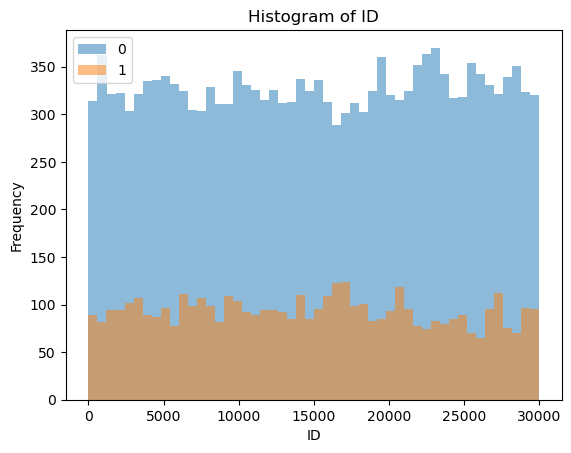

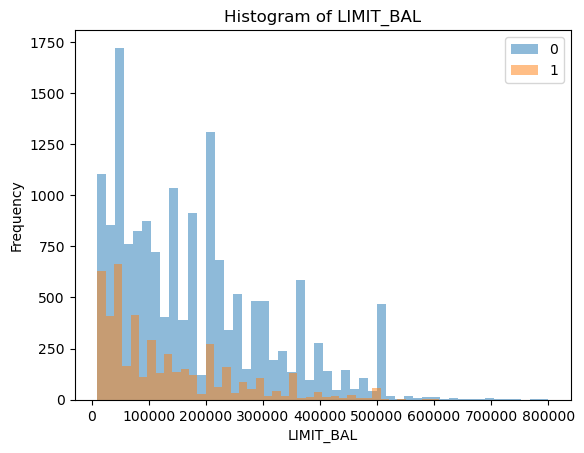

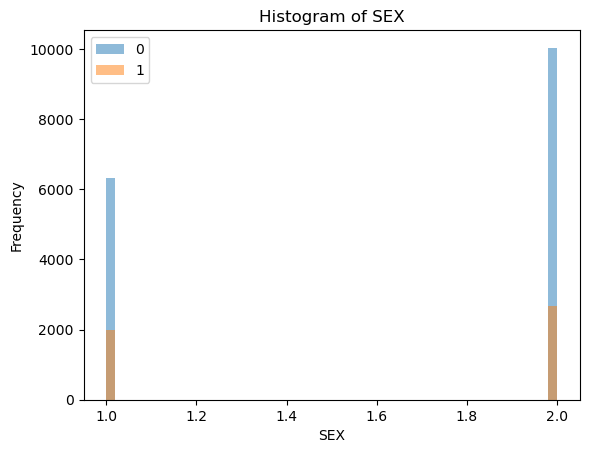

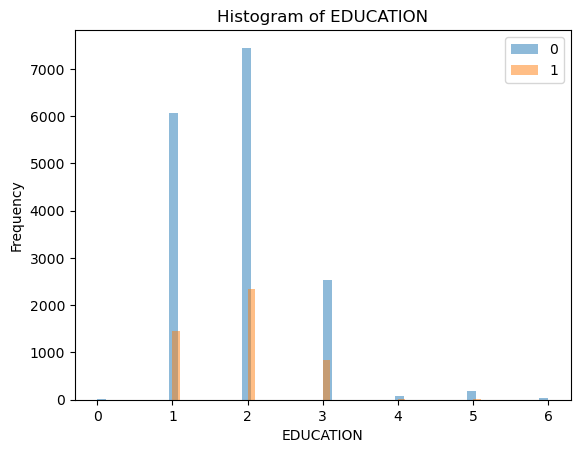

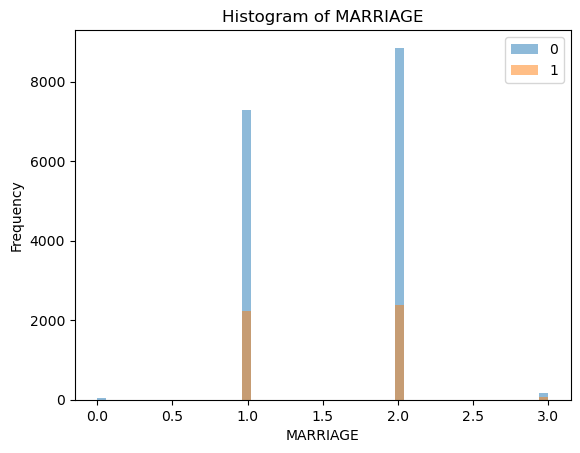

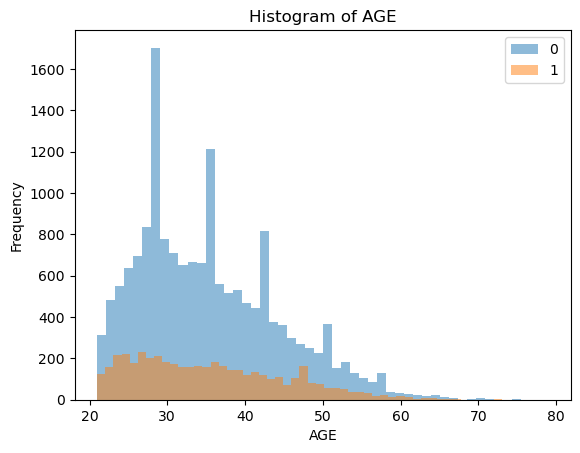

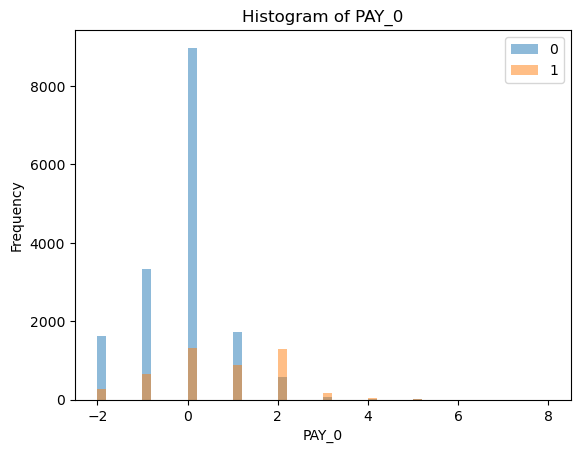

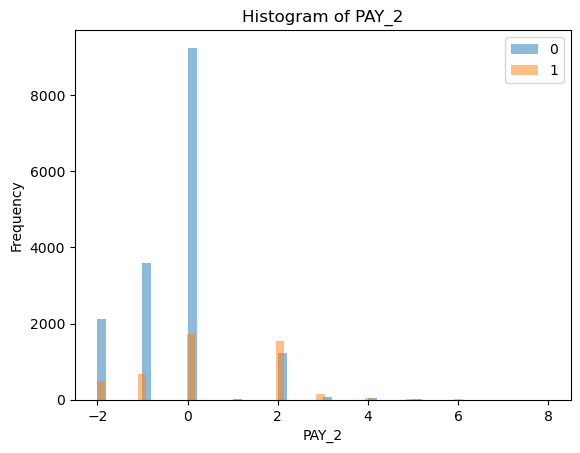

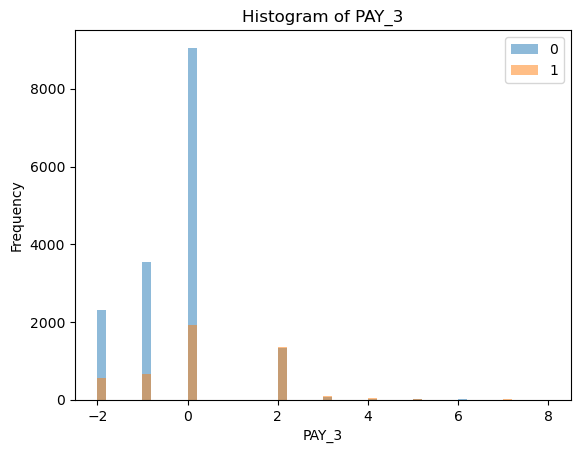

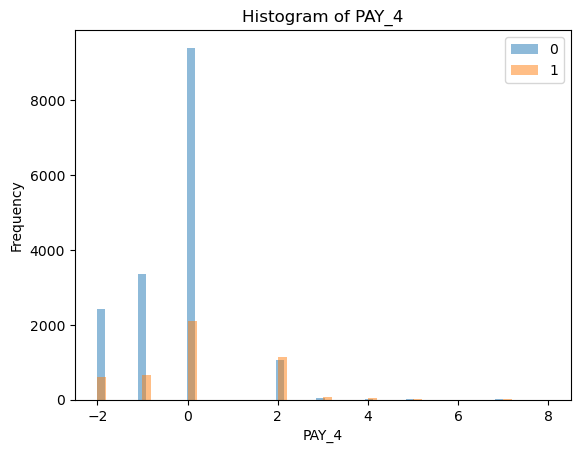

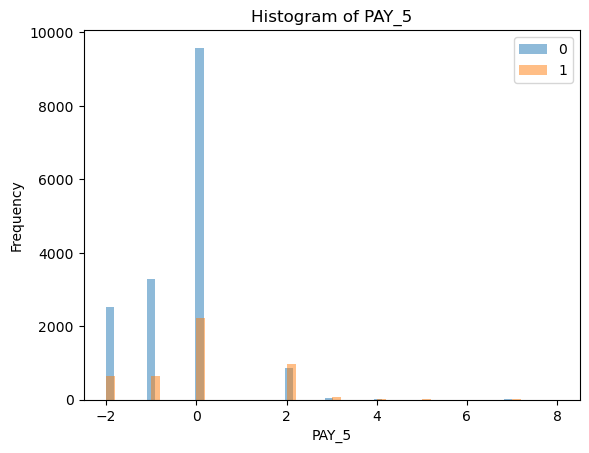

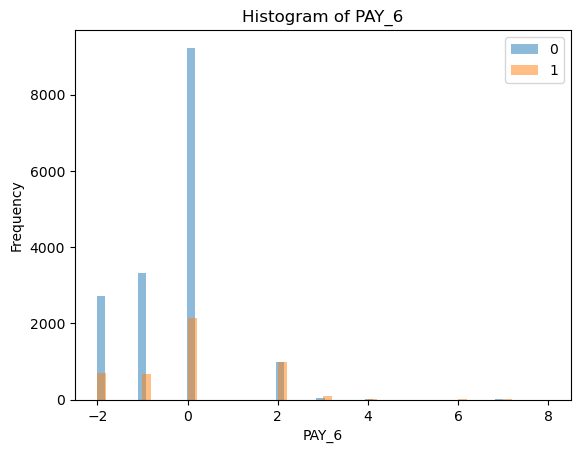

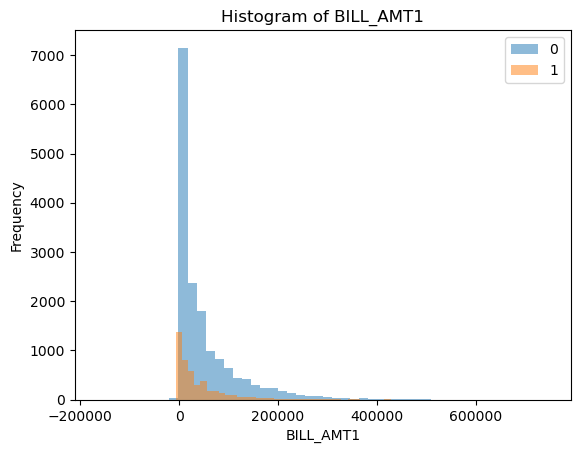

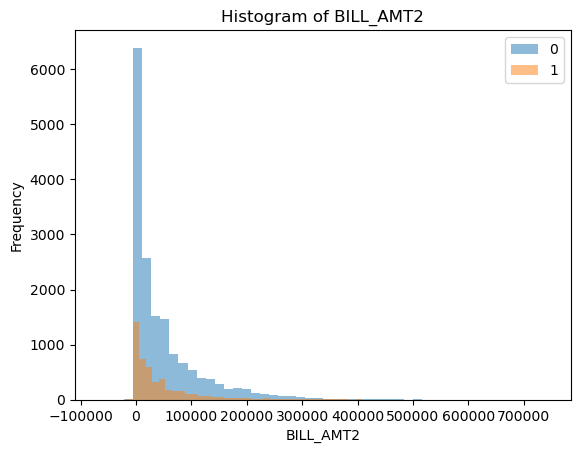

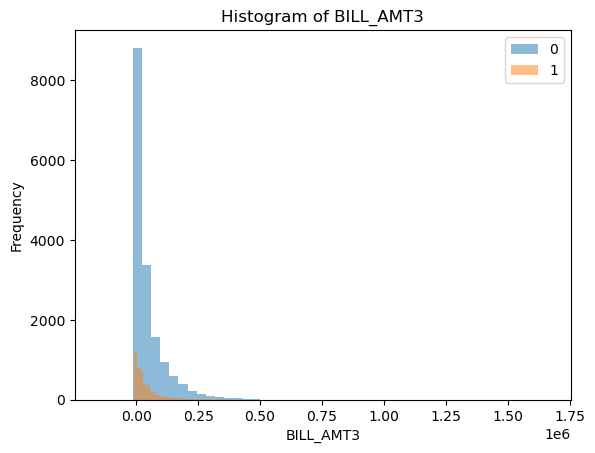

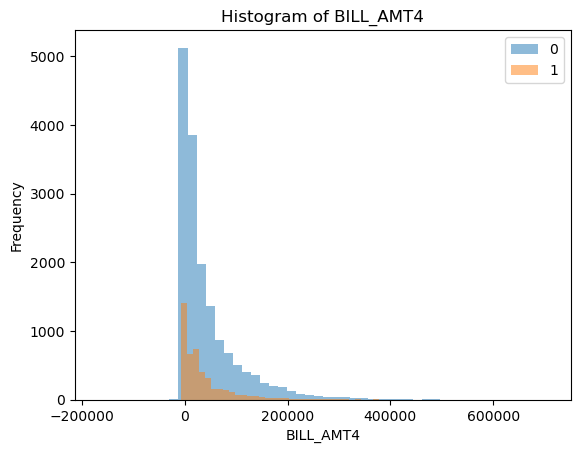

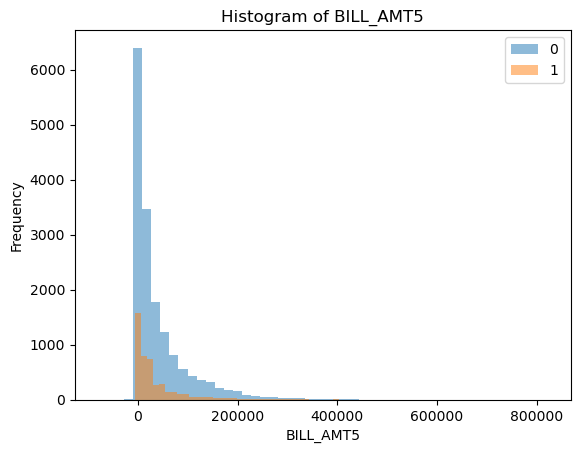

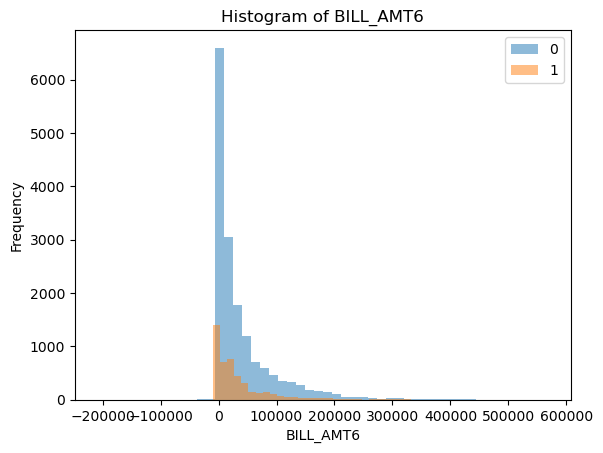

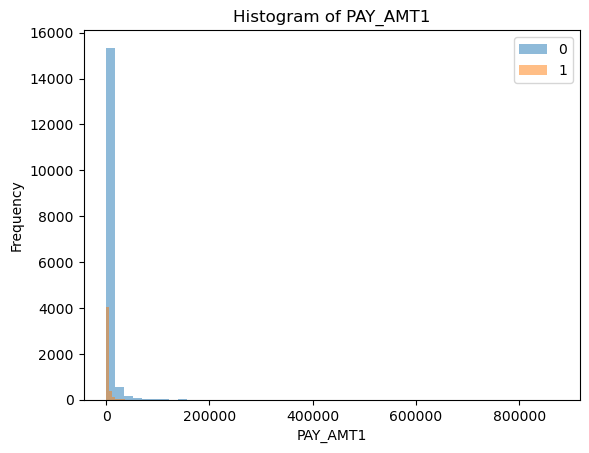

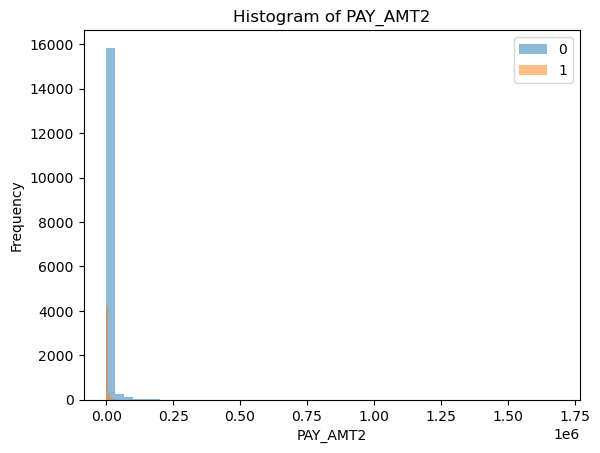

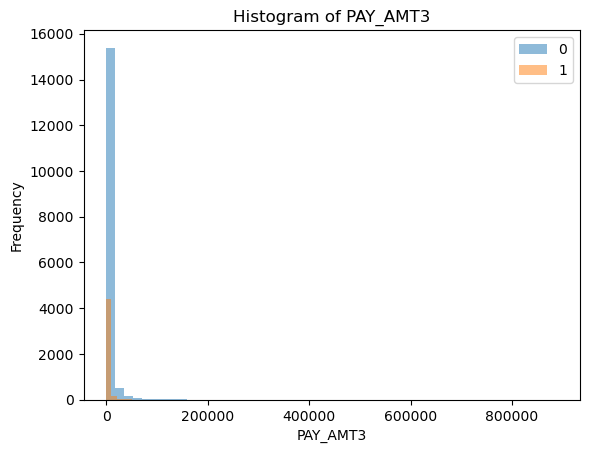

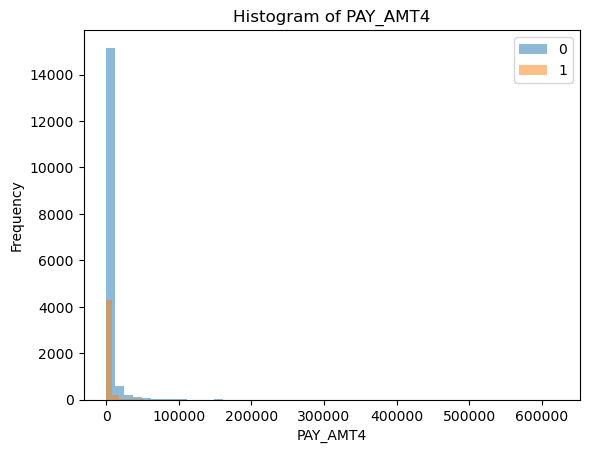

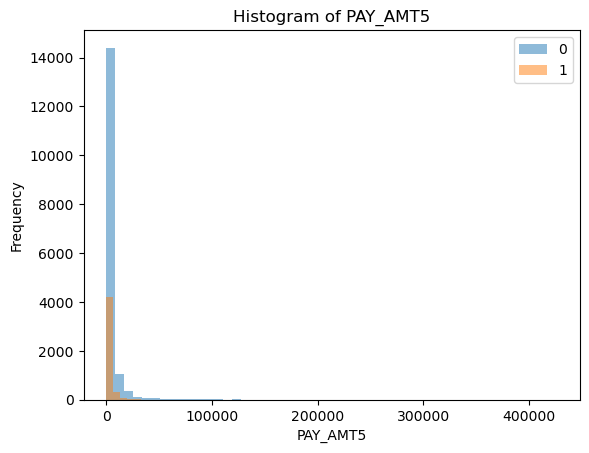

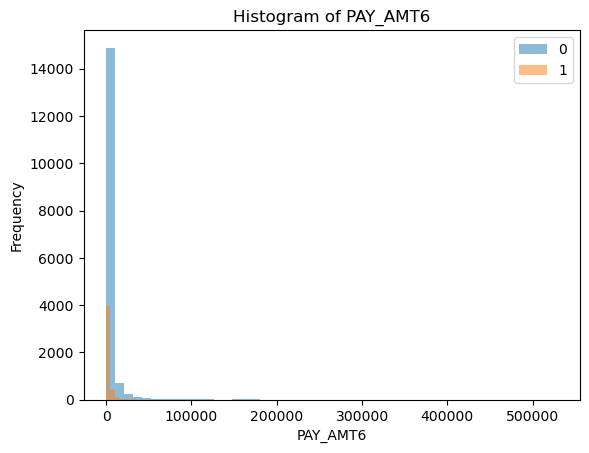

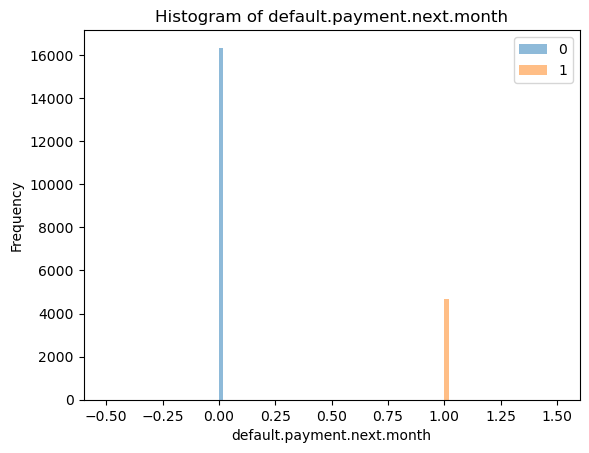

In [7]:
# histograms showing the distributions of each feature for the two target classes
array = np.array(train_df.columns)
features = array.tolist()

for feat in features:
    ax = train_df.groupby("default.payment.next.month")[feat].plot.hist(bins=50, alpha=0.5, legend=True)
    plt.xlabel(feat)
    plt.title("Histogram of " + feat)
    plt.show()

Observations:
- no features with missing values
- all features have numeric values
- however, features like marriage, education, and sex have numeric values that represent categories. 
- Education and PAY_0-6 has an ordinal pattern
- Education has unknown categories with values 5 or 6. 
- Numeric features vary greatly in scale -> need StandardScaler
- based on their similar distributions between the two classes, "sex"  and "marriage" seem less relevant in predicting our target. 

Metric to use:
- Since the imbalance between the two classes of the target feature is not too significant, I think accuracy would still be a good metric to use. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Preprocessing and transformations <a name="5"></a>


In [8]:
# getting rid of the values of education representing unknown and replacing it with NaN. In my opinion, the others category is not informative so also replace with NaN
education_modified = train_df["EDUCATION"].replace([4,5,6], np.nan)
train_df.drop(columns=['EDUCATION'])
train_df['EDUCATION'] = education_modified

missing_val_features = ['EDUCATION'] # education is already ordinally encoded with 1 representing the highest level of education
numeric_features = train_df.drop(columns=["ID", "SEX", "MARRIAGE", "EDUCATION", 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', "default.payment.next.month"]).columns.values.tolist()
ordinal_features = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'] # education already has values following an ordinal pattern
drop_features = ["ID", "SEX", "MARRIAGE"]

ordering = [[-1,0,1,2,3,4,5,6,7,8,9],
           [-1,0,1,2,3,4,5,6,7,8,9],
           [-1,0,1,2,3,4,5,6,7,8,9],
           [-1,0,1,2,3,4,5,6,7,8,9],
           [-1,0,1,2,3,4,5,6,7,8,9],
           [-1,0,1,2,3,4,5,6,7,8,9],]

ct = make_column_transformer(
 (SimpleImputer(strategy="median"), missing_val_features),
 (StandardScaler(), numeric_features), 
 (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1, categories=ordering), ordinal_features), 
 ("drop", drop_features),
)
ct

ColumnTransformer(transformers=[('simpleimputer',
                                 SimpleImputer(strategy='median'),
                                 ['EDUCATION']),
                                ('standardscaler', StandardScaler(),
                                 ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
                                  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                                  'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
                                  'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                  'PAY_AMT6']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[[-1, 0, 1, 2, 3, 4,
                                                             5, 6, 7, 8, 9],
                                                            [-1, 0, 1, 2, 3, 4,
                                                             5, 6, 7, 8, 9],
                                                            [-1, 0, 1, 2, 3, 4,
                                                             5, 6, 7, 8, 9],
                                                            [-1, 0, 1, 2, 3, 4,
                                                             5, 6, 7, 8, 9],
                                                            [-1, 0, 1, 2, 3, 4,
                                                             5, 6, 7, 8, 9],
                                                            [-1, 0, 1, 2, 3, 4,
                                                             5, 6, 7, 8, 9]],
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                  'PAY_6']),
                                ('drop', 'drop', ['ID', 'SEX', 'MARRIAGE'])])

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Baseline model <a name="6"></a>


In [9]:
X_train, y_train = (
    train_df.drop(columns=["default.payment.next.month"]),
    train_df["default.payment.next.month"],
)

X_test, y_test = (
    train_df.drop(columns=["default.payment.next.month"]),
    train_df["default.payment.next.month"],
)

pipe = make_pipeline(ct, DummyClassifier())
cv_scores = cross_validate(pipe, X_train, y_train, return_train_score=True)
pd.DataFrame(cv_scores)

,fit_time,score_time,test_score,train_score
0,0.064312,0.022535,0.778095,0.778155
1,0.077747,0.031792,0.778095,0.778155
2,0.079063,0.017150,0.778095,0.778155
3,0.063860,0.016193,0.778095,0.778155
4,0.062973,0.032325,0.778333,0.778095


The train and test score using the dummy classifier are both around 0.77

<br><br>

<!-- BEGIN QUESTION -->

## 6. Linear models <a name="7"></a>


In [14]:
lr_scores_dict = {
 "C": 10.0 ** np.arange(-4, 6, 1),
 "mean_train_scores": list(),
 "mean_cv_scores": list(),
 "std_train_scores": list(),
 "std_test_scores": list(),   
}

cv_scores_dict = {
    "C": 10.0 ** np.arange(-4, 6, 1),
    "cv_scores": list(),
}

for C in lr_scores_dict["C"]:
     lr_pipe = make_pipeline(ct, LogisticRegression(C=C))
     scores = cross_validate(lr_pipe, X_train, y_train, return_train_score=True)
     cv_scores_dict["cv_scores"].append(scores["test_score"])
     lr_scores_dict["mean_train_scores"].append(scores["train_score"].mean())
     lr_scores_dict["mean_cv_scores"].append(scores["test_score"].mean())
     lr_scores_dict["std_train_scores"].append(scores["train_score"].std())
     lr_scores_dict["std_test_scores"].append(scores["test_score"].std())
    
lr_results_df = pd.DataFrame(lr_scores_dict)

cv_score_df = pd.DataFrame(cv_scores_dict)
lr_best_score = cv_score_df["cv_scores"][np.argmax(lr_results_df['mean_cv_scores'])].max()
lr_best_param = lr_results_df["C"][np.argmax(lr_results_df['mean_cv_scores'])]
lr_best_mean_cv_score = lr_results_df['mean_cv_scores'].iloc[np.argmax(lr_results_df['mean_cv_scores'])]
lr_best_mean_train_score = lr_results_df['mean_train_scores'].iloc[np.argmax(lr_results_df['mean_cv_scores'])]
lr_results_df

,C,mean_train_scores,mean_cv_scores,std_train_scores,std_test_scores
0,0.0001,0.780798,0.780905,0.000270,0.001516
1,0.0010,0.800202,0.800190,0.001222,0.005036
2,0.0100,0.808452,0.808333,0.001481,0.005062
3,0.1000,0.809893,0.810000,0.001487,0.004649
4,1.0000,0.810060,0.810429,0.001600,0.004737
5,10.0000,0.810083,0.810524,0.001664,0.004674
6,100.0000,0.810083,0.810524,0.001664,0.004674
7,1000.0000,0.810095,0.810571,0.001675,0.004616
8,10000.0000,0.810083,0.810524,0.001664,0.004674
9,100000.0000,0.810083,0.810524,0.001664,0.004674


C=1000 seem to be the point where the performance is optimized, with mean validation score of 0.810571, mean train score of 0.810095, and std validation score of 0.001664.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Different models <a name="8"></a>


In [15]:
# Decision Tree Classifier with default max_depth
dtc_pipe = make_pipeline(ct, DecisionTreeClassifier())
dtc_scores = cross_validate(dtc_pipe, X_train, y_train, return_train_score=True)
pd.DataFrame(dtc_scores)

,fit_time,score_time,test_score,train_score
0,1.132509,0.031568,0.725000,0.999286
1,1.126430,0.031417,0.718571,0.999048
2,1.043717,0.033074,0.714286,0.999226
3,1.121181,0.031768,0.735238,0.999405
4,1.057884,0.031337,0.712619,0.998988


This model is very overfitted as the train score is very good but it performs poorly on the validation data

In [16]:
# KNeighborsClassifier with default n_neighbors

kn_pipe = make_pipeline(ct, KNeighborsClassifier())
kn_scores = cross_validate(kn_pipe, X_train, y_train, return_train_score=True)
pd.DataFrame(kn_scores)

,fit_time,score_time,test_score,train_score
0,0.081197,0.801103,0.792381,0.841071
1,0.077705,0.334663,0.793095,0.843155
2,0.062853,0.315348,0.795000,0.845357
3,0.079906,0.331417,0.795714,0.844821
4,0.062623,0.316917,0.793571,0.843155


This model is slightly overfitted with a fairly high train_score and a lower test_score. The test_score does not perform as well as a linear model, but we could find out more after performing hyperparamter optimization with the n_neighbors value.

In [17]:
# RandomForestClassifier with default n_estimators, max_depth, and max_features
rf_pipe = make_pipeline(ct, RandomForestClassifier(random_state=123))
rf_scores = cross_validate(rf_pipe, X_train, y_train, return_train_score=True)
pd.DataFrame(rf_scores)

,fit_time,score_time,test_score,train_score
0,14.353242,0.207441,0.811905,0.999286
1,14.058723,0.219995,0.817619,0.999048
2,14.566445,0.205338,0.811667,0.999226
3,14.517913,0.236249,0.816429,0.999405
4,14.041130,0.220567,0.814286,0.998988


There is less overfitting compared to using just a single decision tree as the test_score is better, but there is still a gap between train_score and test_score. Though, it seems to be performing similarly to our linear model judging from the validation score.

<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Hyperparameter optimization <a name="10"></a>


In [18]:
# optimization for max_depth of DecisionTreeClassifier
param_grid_dtc = {
    "decisiontreeclassifier__max_depth": np.arange(1, 20)
}

gs_dtc =  GridSearchCV(
    make_pipeline(ct, DecisionTreeClassifier()),
    param_grid = param_grid_dtc,
    n_jobs=-1,
    return_train_score=True
)

gs_dtc.fit(X_train, y_train)

dtc_best_cv_score = gs_dtc.best_score_
dtc_best_param = gs_dtc.best_params_
dtc_best_mean_train_score = gs_dtc.cv_results_["mean_train_score"][0]
dtc_best_mean_test_score = gs_dtc.cv_results_["mean_test_score"][0]

The best validation score for DTC is 0.819 with the max_depth of 1

In [19]:
# optimization of n_neighbours for KN
param_grid_kn= {
 "kneighborsclassifier__n_neighbors": [1, 3, 8, 10, 20, 50, 100, 500],
}

gs_kn =  GridSearchCV(
    make_pipeline(ct, KNeighborsClassifier()),
    param_grid = param_grid_kn,
    n_jobs=-1,
    return_train_score=True
)

gs_kn.fit(X_train, y_train)

kn_best_cv_score = gs_kn.best_score_
kn_best_param = gs_kn.best_params_
kn_best_mean_train_score = gs_kn.cv_results_["mean_train_score"][6]
kn_best_mean_cv_score = gs_kn.cv_results_["mean_test_score"][6]


In [ ]:
The best validation score for KNC is 0.813 with n_neighbors=100.

In [20]:
# optimization of n_estimators and max_depth for RandomForestClassifier
param_grid_rf = {
    "randomforestclassifier__n_estimators": [1,3,10,25,50,75,100],
    "randomforestclassifier__max_depth":  np.arange(1, 20),
}

rs_rf =  RandomizedSearchCV(
    make_pipeline(ct, RandomForestClassifier(random_state=123)),
    param_distributions = param_grid_rf,
    n_jobs=-1,
    n_iter=100,
    return_train_score=True
)

rs_rf.fit(X_train, y_train)

index = rs_rf.cv_results_['params'].index(rs_rf.best_params_)
rf_best_cv_score = rs_rf.best_score_
rf_best_param = rs_rf.best_params_
rf_best_mean_train_score = rs_rf.cv_results_["mean_train_score"][index]
rf_best_mean_cv_score = rs_rf.cv_results_["mean_test_score"][index]

The best validation score is 0.8205 with n_estimators=75 and max_depth=7. This is a slightly better performance compared to our linear model.

<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Results on the test set <a name="12"></a>


In [21]:
rf_final_pipeline = make_pipeline(ct, RandomForestClassifier(random_state=123, n_estimators=75, max_depth=7))
rf_final_pipeline.fit(X_train, y_train)
rf_test_score = rf_final_pipeline.score(X_test, y_test)

After training a RandomForestClassifier with the optimized hyperparameters, I got the final test score of 0.8325. This value agrees with the best validation score from before. I do trust the result of this, as there is not a big discrepancy between the value 0.8325 and the validation scores we have seen before using all the other models. I also do not think there is optimization bias as the test score is actually better than the best validation score. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Summary of results <a name="13"></a>


In [22]:
models = ["DecisionTreeClassifier", "KNeighborsClassifier", "RandomForestClassifier", "LogisticRegression"]
best_params = [dtc_best_param, kn_best_param, rf_best_param, lr_best_param]
mean_train_score = [lr_best_mean_train_score, kn_best_mean_train_score, rf_best_mean_train_score, lr_best_mean_train_score]
mean_cv_score = [lr_best_mean_cv_score, kn_best_mean_cv_score, rf_best_mean_cv_score, lr_best_mean_cv_score]
best_cv_score = [dtc_best_cv_score, kn_best_cv_score, rf_best_cv_score, lr_best_score]
test_score = [np.nan, np.nan, rf_test_score, np.nan]

result_df = pd.DataFrame({"models": models, "best params": best_params, "mean train scores": mean_train_score, "mean cv scores": mean_cv_score, "best cv scores": best_cv_score, "test score": test_score})
result_df = result_df.set_index("models")
result_df

,best params,mean train scores,mean cv scores,best cv scores,test score
models,,,,,
DecisionTreeClassifier,{'decisiontreeclassifier__max_depth': 1},0.810095,0.810571,0.818762,NaN
KNeighborsClassifier,{'kneighborsclassifier__n_neighbors': 100},0.814476,0.813190,0.813190,NaN
RandomForestClassifier,"{'randomforestclassifier__n_estimators': 75, '...",0.835048,0.820476,0.820476,0.832524
LogisticRegression,1000.0,0.810095,0.810571,0.818810,NaN


Overall, all of the training scores and validation scores with different models are consistent with each other (all within 0.81-0.84). The RandomForestClassifier with n_estimators = 75 and max_depth = 7 performs the best out of the four models, and has a final test score of 0.8325.

Idea for improvement: 

With the slight imbalance that exist between the two classes of the target feature, it might be worthwhile to try other metrics of assessing our model performance such as precision and recall. In the context of determining whether or not someone will pay their credit bill, I think False Positives are more damaging than False Negatives (positive being predicting that a user WILL pay their bill), because predicting a user will pay their bill when in fact they will not is more damaging financially. Therefore, it would make sense to tune our model to prioritize Precision, and this may give us better performance over our current model which only takes into account the accuracy. 

<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->
# Final results: test score of 0.833 with the accuracy metric
